Detect anomalies of stocks using knn.

In [19]:
# Necessary import statements
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from numpy.linalg import inv

In [20]:
# Transform the downloaded file into a pandas dataframe:
df = pd.read_csv('BTC_GOLD_SP500.csv')

df.index = df['Date']
df = df.drop(['Date'],axis=1)

# Visualize data to make sure it is working:
df.head()

,BTC,GOLD,S&P500
Date,,,
2020-03-18,5363.822853,1477.9,2401.4
2020-03-17,5465.582594,1524.9,2485.5
2020-03-16,4944.702336,1486.5,2405.3
2020-03-13,5672.681201,1516.7,2683.9
2020-03-12,5800.208905,1590.3,2468.9


In [21]:
# Set up the delta: The role of this is to calculate the percentage in the daily closing prices of each stock.
N,d = df.shape

# the delta provided did not calculate the daily percentage change the way Dr. Medina desired so I slightly altered the code:
delta = pd.DataFrame(100*np.divide(df.iloc[:N-1,:].values-df.iloc[1:,:].values, df.iloc[1:,:].values),
                    columns=df.columns, index=df.iloc[:N-1].index)

# Visualize delta to make sure it is working:
delta.head()

,BTC,GOLD,S&P500
Date,,,
2020-03-18,-1.861828,-3.082169,-3.383625
2020-03-17,10.534107,2.583249,3.334303
2020-03-16,-12.833065,-1.991165,-10.380417
2020-03-13,-2.198674,-4.628058,8.708332
2020-03-12,-27.090062,-3.166291,-9.904025


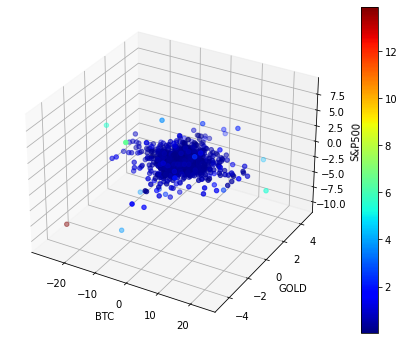

,BTC,GOLD,S&P500,Anomaly score
Date,,,,
2020-03-12,-27.090062,-3.166291,-9.904025,13.903839
2020-03-13,-2.198674,-4.628058,8.708332,6.580210
2018-02-06,-22.172241,-0.523756,3.320934,5.608748
2019-05-13,23.781339,1.118533,-2.764211,5.477931
2016-06-24,13.047935,4.694799,-4.140944,4.315667


In [22]:
# knn algorithm for 2 neighbors:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

anomaly_score = distances[:,knn-1]

# "Plot the percentage of changes colored by the anomaly score.:"
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta['BTC'],delta['GOLD'],delta['S&P500'],c=anomaly_score,cmap='jet') # I changes to delta['name_of_row'] from sample code b/c there was no attribute for S&P500.
ax.set_xlabel('BTC')
ax.set_ylabel('GOLD')
ax.set_zlabel('S&P500')
fig.colorbar(p)
plt.show()

# "List the dates associated with the top-5 highest anomaly scores for each k":
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score')

Explain the significance of the dates for 2 neighbors:
2020-03-12: COVID-19 was announced as a global pandemic and everything crashes
2020-03-13: COVID-19 was announced as a global pandemic but SP bounces back up
2018-02-06: Bitcoin crashes heavily and people no longer believe in bitcoin while gold and SP did not have any major changes.
2019-05-13: People belive in bitcoin again
2016-06-24: Bitcoin rises heavily in value over night

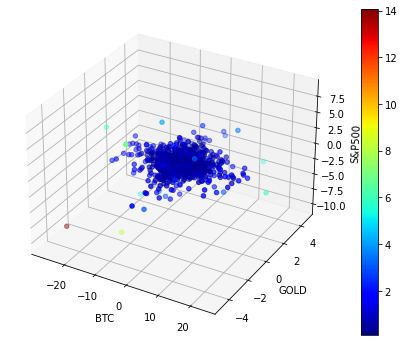

,BTC,GOLD,S&P500,Anomaly score
Date,,,,
2020-03-12,-27.090062,-3.166291,-9.904025,14.081407
2020-03-16,-12.833065,-1.991165,-10.380417,8.171245
2020-03-13,-2.198674,-4.628058,8.708332,6.935263
2019-05-13,23.781339,1.118533,-2.764211,6.198351
2018-02-06,-22.172241,-0.523756,3.320934,6.149555


In [23]:
# knn algorithm for 4 neighbors:
knn = 4
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

anomaly_score = distances[:,knn-1]

# "Plot the percentage of changes colored by the anomaly score.:"
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta['BTC'],delta['GOLD'],delta['S&P500'],c=anomaly_score,cmap='jet')
ax.set_xlabel('BTC')
ax.set_ylabel('GOLD')
ax.set_zlabel('S&P500')
fig.colorbar(p)
plt.show()

# "List the dates associated with the top-5 highest anomaly scores for each k":
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score')

Explain the significance of the dates for 4 neighbors:
2020-03-12: COVID-19 was announced as a global pandemic and everything crashes
2020-03-16: COVID-19 was announced as a global pandemic but SP bounces back up
2020-03-13: COVID-19 was announced as a global pandemic but SP bounces back up
2019-05-13: People belive in bitcoin again
2018-02-06: Bitcoin crashes heavily and people no longer believe in bitcoin while gold and SP did not have any major changes.

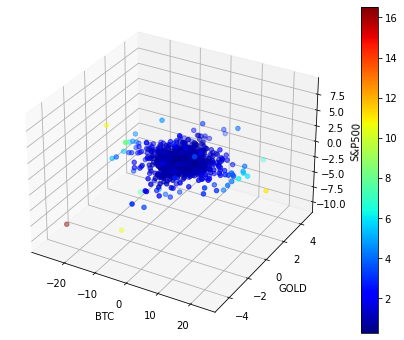

,BTC,GOLD,S&P500,Anomaly score
Date,,,,
2020-03-12,-27.090062,-3.166291,-9.904025,16.537055
2019-05-13,23.781339,1.118533,-2.764211,11.193693
2018-02-06,-22.172241,-0.523756,3.320934,10.644747
2020-03-16,-12.833065,-1.991165,-10.380417,10.570421
2020-03-13,-2.198674,-4.628058,8.708332,8.172835


In [24]:
# knn algorithm for 15 neighbors:
knn = 15
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

anomaly_score = distances[:,knn-1]

# "Plot the percentage of changes colored by the anomaly score.:"
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta['BTC'],delta['GOLD'],delta['S&P500'],c=anomaly_score,cmap='jet')
ax.set_xlabel('BTC')
ax.set_ylabel('GOLD')
ax.set_zlabel('S&P500')
fig.colorbar(p)
plt.show()

# "List the dates associated with the top-5 highest anomaly scores for each k":
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score')

Explain the significance of the dates for 15 neighbors:
2020-03-12: COVID-19 was announced as a global pandemic and everything crashes
2019-05-13: People belive in bitcoin again
2018-02-06: Bitcoin crashes heavily and people no longer believe in bitcoin while gold and SP did not have any major changes.")
2020-03-16: COVID-19 was announced as a global pandemic but SP bounces back up
2020-03-13: COVID-19 was announced as a global pandemic but SP bounces back up